## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
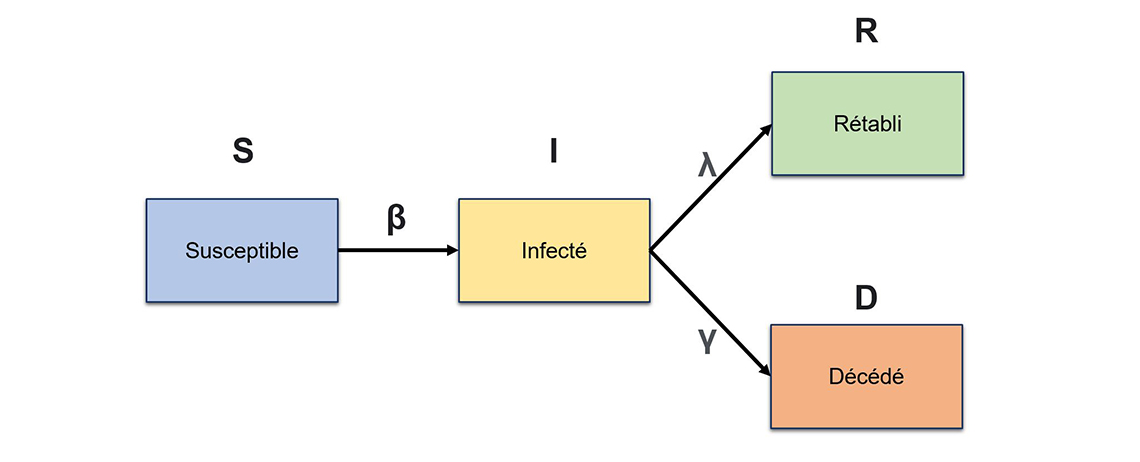


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product


In [19]:
def euler_method_sird(beta, gamma, mu, step, nb_jours, s0, i0, r0, d0):
    """
    Implémente la méthode d'Euler pour le modèle SIRD.

    Arguments :
    beta -- Taux de transmission
    gamma -- Taux de guérison
    mu -- Taux de mortalité
    step -- Pas de temps
    nb_jours -- Durée de la simulation en jours
    s0, i0, r0, d0 -- Conditions initiales (% de la population)

    Retourne :
    time -- Liste des temps
    s, i, r, d -- Listes des populations à chaque instant
    """
    time = [0]
    s = [s0]
    i = [i0]
    r = [r0]
    d = [d0]

    nb_points = int(nb_jours / step)
    for _ in range(1, nb_points):
        new_time = time[-1] + step
        new_s = s[-1] - beta * s[-1] * i[-1] * step
        new_i = i[-1] + (beta * s[-1] * i[-1] - gamma * i[-1] - mu * i[-1]) * step
        new_r = r[-1] + gamma * i[-1] * step
        new_d = d[-1] + mu * i[-1] * step

        time.append(new_time)
        s.append(new_s)
        i.append(new_i)
        r.append(new_r)
        d.append(new_d)

    return time, s, i, r, d


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

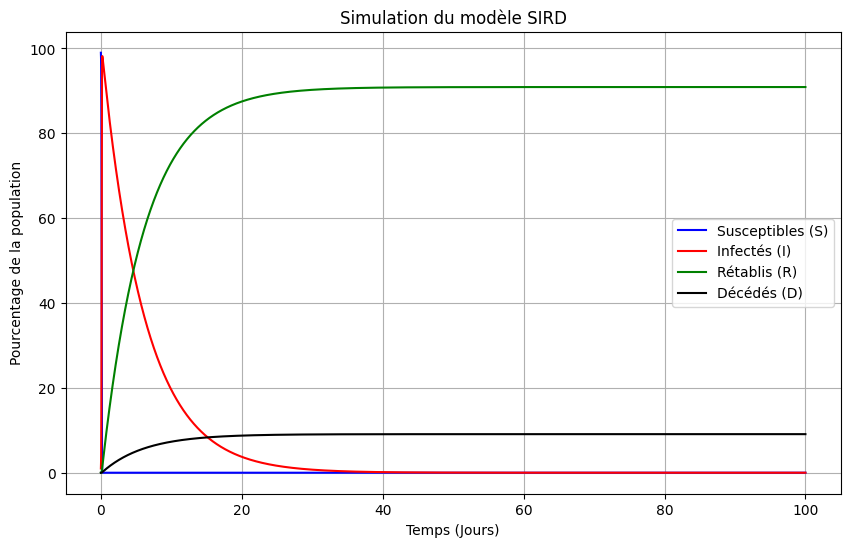

In [25]:


def plot_sird(time, s, i, r, d):
    """
    Tracer les courbes SIRD.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(time, s, "b-", label='Susceptibles (S)')
    plt.plot(time, i, "r-", label='Infectés (I)')
    plt.plot(time, r, "g-", label='Rétablis (R)')
    plt.plot(time, d, "k-", label='Décédés (D)')

    plt.xlabel('Temps (Jours)')
    plt.ylabel('Pourcentage de la population')
    plt.title('Simulation du modèle SIRD')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":

  

    # Paramètres du modèle
    beta = 0.5    # Taux de transmission
    gamma = 0.15  # Taux de guérison
    mu = 0.015    # Taux de mortalité
    step = 0.01   # Pas de temps
    nb_jours = 100  # Durée de la simulation

    # Conditions initiales
    s0 = 99  # % de la population susceptible
    i0 = 1   # % de la population infectée
    r0 = 0   # % de la population rétablie
    d0 = 0   # % de la population décédée

    # Simulation
    time, s, i, r, d = euler_method_sird(beta, gamma, mu, step, nb_jours, s0, i0, r0, d0)

    # Visualisation
    plot_sird(time, s, i, r, d)


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


Meilleurs paramètres trouvés : beta=0.5, gamma=0.15, mu=0.005 avec un coût de 0.9672036711524055


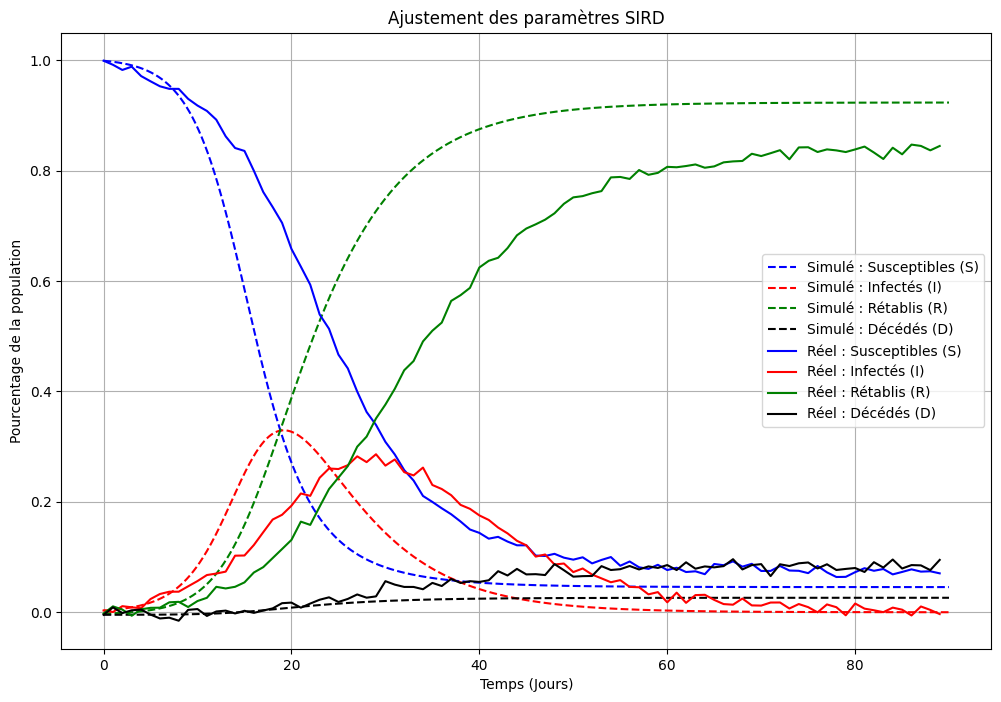

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import product

def euler_method_sird(beta, gamma, mu, step, nb_jours, s0, i0, r0, d0):
    """
    Méthode d'Euler pour le modèle SIRD.
    """
    time = [0]
    s = [s0]
    i = [i0]
    r = [r0]
    d = [d0]

    nb_points = int(nb_jours / step)
    for _ in range(1, nb_points):
        new_time = time[-1] + step
        new_s = s[-1] - beta * s[-1] * i[-1] * step
        new_i = i[-1] + (beta * s[-1] * i[-1] - gamma * i[-1] - mu * i[-1]) * step
        new_r = r[-1] + gamma * i[-1] * step
        new_d = d[-1] + mu * i[-1] * step

        time.append(new_time)
        s.append(new_s)
        i.append(new_i)
        r.append(new_r)
        d.append(new_d)

    return time, np.array(s), np.array(i), np.array(r), np.array(d)

def cost_function(beta, gamma, mu, real_data, step, nb_jours, s0, i0, r0, d0):
    """
    Fonction de coût basée sur l'erreur quadratique moyenne (MSE).
    """
    time, s, i, r, d = euler_method_sird(beta, gamma, mu, step, nb_jours, s0, i0, r0, d0)
    
    mse_s = mean_squared_error(real_data["Susceptibles"], s[:len(real_data)])
    mse_i = mean_squared_error(real_data["Infectés"], i[:len(real_data)])
    mse_r = mean_squared_error(real_data["Rétablis"], r[:len(real_data)])
    mse_d = mean_squared_error(real_data["Décès"], d[:len(real_data)])
    
    return mse_s + mse_i + mse_r + mse_d

def grid_search(real_data, beta_range, gamma_range, mu_range, step, nb_jours, s0, i0, r0, d0):
    """
    Recherche par grille pour trouver les paramètres optimaux.
    """
    best_params = None
    best_cost = float("inf")
    
    for beta, gamma, mu in product(beta_range, gamma_range, mu_range):
        cost = cost_function(beta, gamma, mu, real_data, step, nb_jours, s0, i0, r0, d0)
        if cost < best_cost:
            best_cost = cost
            best_params = (beta, gamma, mu)
    
    return best_params, best_cost

def plot_comparison(real_data, sim_data):
    """
    Tracer la comparaison entre données réelles et simulées.
    """
    time, s, i, r, d = sim_data
    plt.figure(figsize=(12, 8))
    
    # Données simulées
    plt.plot(time, s, "b--", label="Simulé : Susceptibles (S)")
    plt.plot(time, i, "r--", label="Simulé : Infectés (I)")
    plt.plot(time, r, "g--", label="Simulé : Rétablis (R)")
    plt.plot(time, d, "k--", label="Simulé : Décédés (D)")
    
    # Données réelles
    plt.plot(real_data["Jour"], real_data["Susceptibles"], "b-", label="Réel : Susceptibles (S)")
    plt.plot(real_data["Jour"], real_data["Infectés"], "r-", label="Réel : Infectés (I)")
    plt.plot(real_data["Jour"], real_data["Rétablis"], "g-", label="Réel : Rétablis (R)")
    plt.plot(real_data["Jour"], real_data["Décès"], "k-", label="Réel : Décédés (D)")

    plt.xlabel("Temps (Jours)")
    plt.ylabel("Pourcentage de la population")
    plt.title("Ajustement des paramètres SIRD")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Chargement des données
    dataset_path = "sird_dataset.csv"
    real_data = pd.read_csv(dataset_path)

    # Conditions initiales
    s0 = real_data["Susceptibles"].iloc[0]
    i0 = real_data["Infectés"].iloc[0]
    r0 = real_data["Rétablis"].iloc[0]
    d0 = real_data["Décès"].iloc[0]

    # Paramètres de simulation
    step = 0.01
    nb_jours = len(real_data)

    # Plage de valeurs pour la recherche par grille
    beta_range = np.linspace(0.25, 0.5, 5)
    gamma_range = np.linspace(0.08, 0.15, 5)
    mu_range = np.linspace(0.005, 0.015, 5)

    # Recherche des paramètres optimaux
    best_params, best_cost = grid_search(real_data, beta_range, gamma_range, mu_range, step, nb_jours, s0, i0, r0, d0)
    print(f"Meilleurs paramètres trouvés : beta={best_params[0]}, gamma={best_params[1]}, mu={best_params[2]} avec un coût de {best_cost}")

    # Simulation avec les paramètres optimaux
    sim_data = euler_method_sird(best_params[0], best_params[1], best_params[2], step, nb_jours, s0, i0, r0, d0)

    # Tracer la comparaison
    plot_comparison(real_data, sim_data)
#1

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

R0 sans intervention : 3.03
R0 avec intervention : 1.82


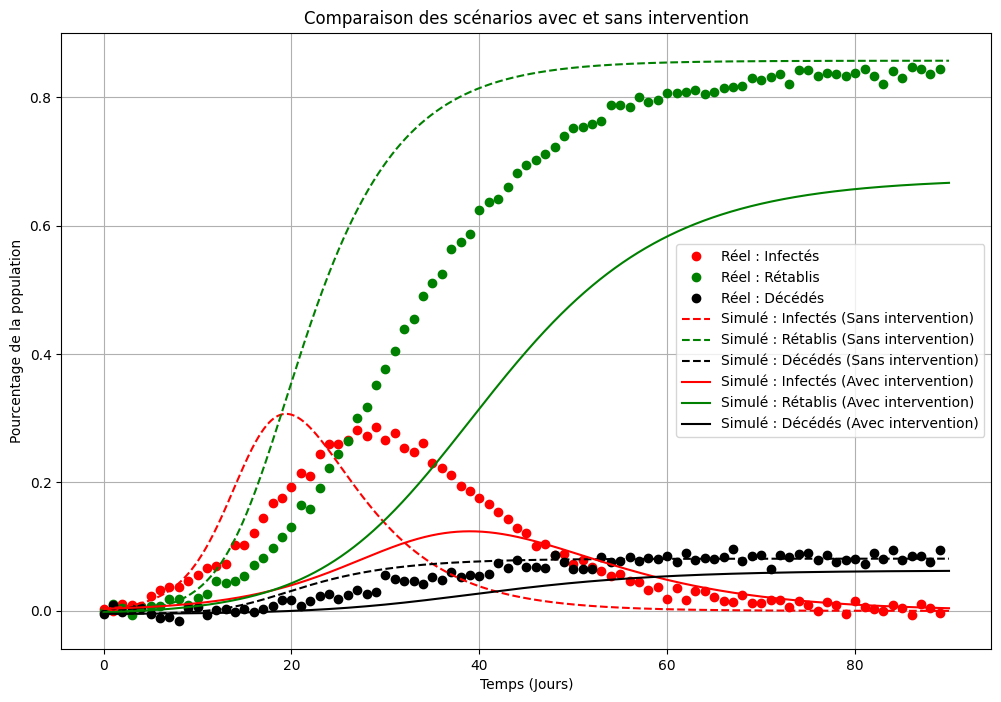

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_R0(beta, gamma, mu):
    """
    Calcule le nombre de reproduction de base R0.
    """
    return beta / (gamma + mu)

def euler_method_sird(beta, gamma, mu, step, nb_jours, s0, i0, r0, d0):
    """
    Méthode d'Euler pour le modèle SIRD.
    """
    time = [0]
    s = [s0]
    i = [i0]
    r = [r0]
    d = [d0]

    nb_points = int(nb_jours / step)
    for _ in range(1, nb_points):
        new_time = time[-1] + step
        new_s = s[-1] - beta * s[-1] * i[-1] * step
        new_i = i[-1] + (beta * s[-1] * i[-1] - gamma * i[-1] - mu * i[-1]) * step
        new_r = r[-1] + gamma * i[-1] * step
        new_d = d[-1] + mu * i[-1] * step

        time.append(new_time)
        s.append(new_s)
        i.append(new_i)
        r.append(new_r)
        d.append(new_d)

    return time, np.array(s), np.array(i), np.array(r), np.array(d)

def plot_comparison(real_data, time, no_intervention, intervention):
    """
    Compare les scénarios avec et sans intervention.
    """
    s_no, i_no, r_no, d_no = no_intervention
    s_int, i_int, r_int, d_int = intervention

    plt.figure(figsize=(12, 8))
    
    # Données réelles
    plt.plot(real_data["Jour"], real_data["Infectés"], "ro", label="Réel : Infectés")
    plt.plot(real_data["Jour"], real_data["Rétablis"], "go", label="Réel : Rétablis")
    plt.plot(real_data["Jour"], real_data["Décès"], "ko", label="Réel : Décédés")

    # Scénario sans intervention
    plt.plot(time, i_no, "r--", label="Simulé : Infectés (Sans intervention)")
    plt.plot(time, r_no, "g--", label="Simulé : Rétablis (Sans intervention)")
    plt.plot(time, d_no, "k--", label="Simulé : Décédés (Sans intervention)")
    
    # Scénario avec intervention
    plt.plot(time, i_int, "r-", label="Simulé : Infectés (Avec intervention)")
    plt.plot(time, r_int, "g-", label="Simulé : Rétablis (Avec intervention)")
    plt.plot(time, d_int, "k-", label="Simulé : Décédés (Avec intervention)")

    plt.xlabel("Temps (Jours)")
    plt.ylabel("Pourcentage de la population")
    plt.title("Comparaison des scénarios avec et sans intervention")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    
    dataset_path = "sird_dataset.csv" 
    real_data = pd.read_csv(dataset_path)

    # Conditions initiales à partir des données
    s0 = real_data["Susceptibles"].iloc[0]
    i0 = real_data["Infectés"].iloc[0]
    r0 = real_data["Rétablis"].iloc[0]
    d0 = real_data["Décès"].iloc[0]

    # Paramètres communs
    gamma = 0.15
    mu = 0.015
    step = 0.01
    nb_jours = len(real_data)

    # Scénario sans intervention
    beta_no_intervention = 0.5
    time, s_no, i_no, r_no, d_no = euler_method_sird(beta_no_intervention, gamma, mu, step, nb_jours, s0, i0, r0, d0)

    # Scénario avec intervention (réduction de beta à cause de la distanciation sociale)
    beta_intervention = 0.3
    time, s_int, i_int, r_int, d_int = euler_method_sird(beta_intervention, gamma, mu, step, nb_jours, s0, i0, r0, d0)

    # Calcul de R0 pour les deux scénarios
    R0_no_intervention = calculate_R0(beta_no_intervention, gamma, mu)
    R0_intervention = calculate_R0(beta_intervention, gamma, mu)

    print(f"R0 sans intervention : {R0_no_intervention:.2f}")
    print(f"R0 avec intervention : {R0_intervention:.2f}")

    # Comparaison des scénarios
    plot_comparison(
        real_data,
        time,
        (s_no, i_no, r_no, d_no),
        (s_int, i_int, r_int, d_int)
    )


3.